In [1]:
#Within a few lines of code, FinQuant can generate an object that holds your stock prices of your desired financial portfolio, analyses it, and can create plots of different kinds of Returns, Moving Averages, Moving Average Bands with buy/sell signals, and Bollinger Bands. It also allows for the optimisation 
#based on the Efficient Frontier or a Monte Carlo run of the financial portfolio within a few lines of code. Some of the results are shown here.

In [17]:
!pip install FinQuant

In [19]:
! pip install yfinance 

In [20]:
from finquant.portfolio import build_portfolio
names = ['GOOG', 'AMZN', 'MCD', 'DIS']
pf = build_portfolio(names=names, data_api="yfinance")

[*********************100%***********************]  4 of 4 completed


In [21]:
pf.properties()

----------------------------------------------------------------------
Stocks: GOOG, AMZN, MCD, DIS
Time window/frequency: 252
Risk free rate: 0.005
Portfolio Expected Return: 0.281
Portfolio Volatility: 0.259
Portfolio Sharpe Ratio: 1.063

Skewness:
       GOOG      AMZN       MCD       DIS
0  1.702124  2.136712  2.195113  2.187083

Kurtosis:
       GOOG      AMZN       MCD       DIS
0  3.096726  3.760567  4.206098  4.369931

Information:
   Allocation  Name
0        0.25  GOOG
1        0.25  AMZN
2        0.25   MCD
3        0.25   DIS
----------------------------------------------------------------------


In [22]:
#Moving Averages

                   DIS         10d  ...        150d        200d
Date                                ...                        
2021-09-20  178.610001  182.459112  ...  176.113898  172.628545
2021-09-21  171.169998  180.406546  ...  176.048416  172.614032
2021-09-22  173.649994  179.178082  ...  176.016649  172.624340
2021-09-23  176.250000  178.645703  ...  176.019739  172.660416
2021-09-24  176.000000  178.164666  ...  176.019478  172.693646

[5 rows x 6 columns]


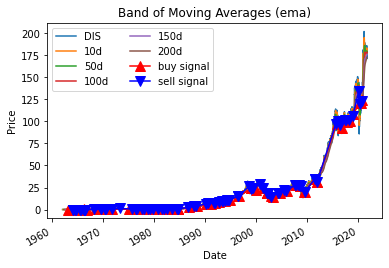

In [23]:
from finquant.moving_average import compute_ma, ema
# get stock data for Disney
dis = pf.get_stock("DIS").data.copy(deep=True)
spans = [10, 50, 100, 150, 200]
# computing and visualising a band of moving averages
ma = compute_ma(dis, ema, spans, plot=True)
print(ma.tail())

In [24]:
#Portfolio Optimisation

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


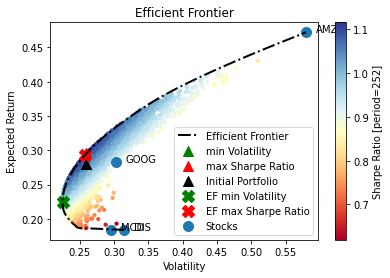

In [25]:
# Monte Carlo optimisation
opt_w, opt_res = pf.mc_optimisation(num_trials=5000)
pf.mc_plot_results()
# minimisation to compute efficient frontier and optimal portfolios along it
pf.ef_plot_efrontier()
pf.ef.plot_optimal_portfolios()
# plotting individual stocks
pf.plot_stocks()